The representation graph offers a mathematical handle on YAML. These examples should help understanding the richness of such graph when using sequences, maps and nesting.

In [3]:
# !pip install -e ~/xgi["all"]

Obtaining file:///home/mcoll/xgi
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for xgi (pyproject.toml) ... done
  Created wheel for xgi: filename=xgi-0.9.2-0.editable-py3-none-any.whl size=9226 sha256=2b277dd74fbf9183619e9b7c9333542c6e6af92b40700639c2fa716fced99e06
  Stored in directory: /tmp/pip-ephem-wheel-cache-2g_b5sl8/wheels/78/6c/7c/1fc174523ac7ee4e9c44d1983164945548553b5398a6c86461
Successfully built xgi
  Attempting uninstall: xgi
    Found existing installation: xgi 0.9.2
    Uninstalling xgi-0.9.2:
      Successfully uninstalled xgi-0.9.2


In [1]:
import networkx as nx
import yaml
import xgi

from src import nx_yaml

def draw(stream):
    G = yaml.compose(stream, Loader=nx_yaml.NxSafeLoader)
    H = xgi.from_bipartite_graph(G)
    # nx.draw_networkx(G, pos=nx.bipartite_layout(G, {n for n, d in G.nodes(data=True) if d["bipartite"] == 0}))
    xgi.draw_bipartite(H)
    # xgi.draw_multilayer(H)
    # xgi.draw(H)

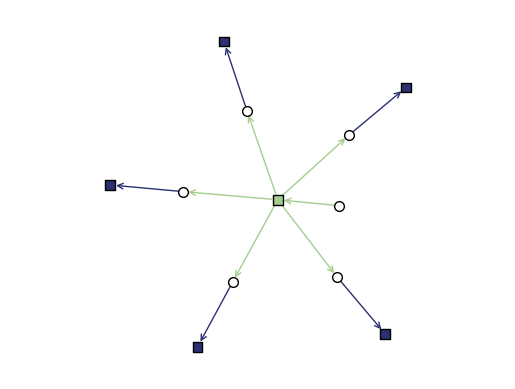

In [2]:
# in a set each scalar element is linked to
# the root mapping, so there are 6 elements in total
draw("{1, 2, 3, 4, 5}")

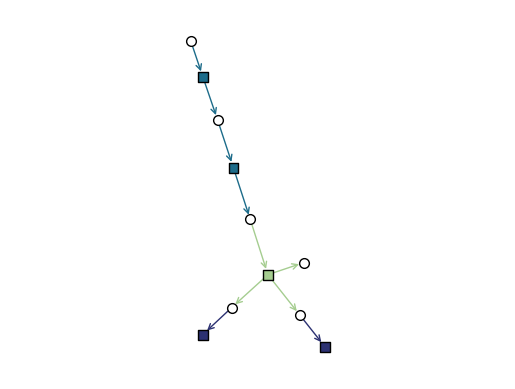

In [3]:
# lists have pairwise hyperedges
draw("[{2, 4}, 3, 4]")

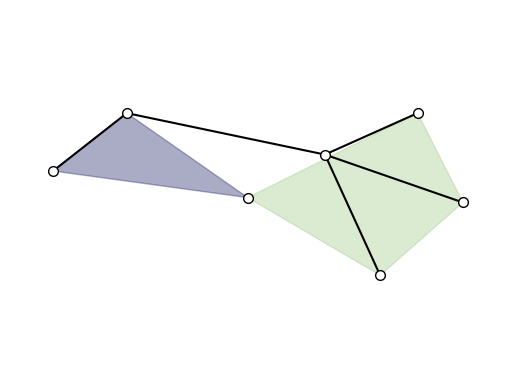

In [4]:
# maps combine all keys into one hyperedge
# and each key-value pair as well.
draw("""
1: 2
{6, 7}: 8
""")

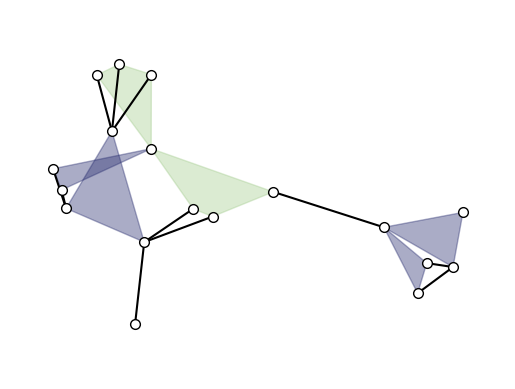

In [5]:
draw("""
- {1, 2}:
    ? {3, 4}
    ? {5, 6, 7}
- 8: {9, a}
""")

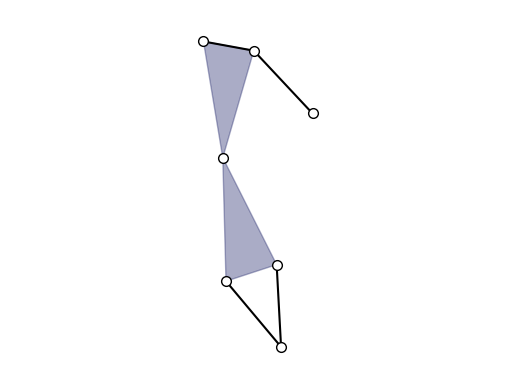

In [38]:
# https://xgi.readthedocs.io/en/latest/api/tutorials/recipes.html#8.-Plot-a-hypergraph-showing-one-order-only
# e.g H = xgi.Hypergraph([{1, 2, 3}, {1, 2}, {4, 5, 6}, {3, 4}])
# TODO
draw("""
- 1: 3
- {2, 3}
""")

So far we have used unique integer indices to avoid confusion. These were irrelevant because the encoding only cares about document structure. It is natural to think about equal scalars as the same nodes but that must be handled separately.

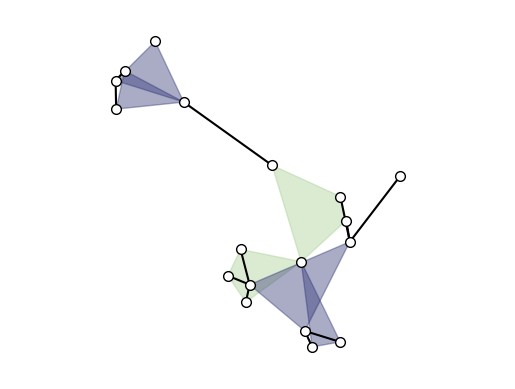

In [7]:
# nesting, lists, maps, sets with a single element.
draw("""
- {~, ~}:
    ? {~, ~}
    ? {~, ~, ~}
- ~: {~, ~}
""")

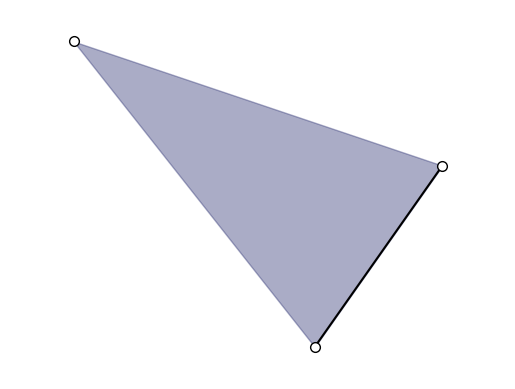

In [8]:
draw("left node: right node")